In [49]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# from src.gnn_models import FastSTEPDataset
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import pickle
import time

from src.data_loader import *
from src.visualization import *
from tqdm import tqdm
from src.convert_graphml_to_pyg_data_multithread import *
#%aimport src.convert_graphml_to_pyg_data
#%aimport src.data_loader
#%aimport src.visualization

In [72]:
sync_dataset = pd.read_csv("./data/synced_dataset_final.csv")
sync_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62198 entries, 0 to 62197
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             62198 non-null  int64  
 1   faces               62198 non-null  float64
 2   edges               62198 non-null  float64
 3   vertices            62198 non-null  float64
 4   step_file           62198 non-null  object 
 5   depth               62198 non-null  float64
 6   width               62198 non-null  float64
 7   height              62198 non-null  float64
 8   area                62198 non-null  float64
 9   volume              62198 non-null  float64
 10  bbox_depth          62198 non-null  float64
 11  bbox_height         62198 non-null  float64
 12  bbox_width          62198 non-null  float64
 13  bbox_area           62198 non-null  float64
 14  bbox_volume         62198 non-null  float64
 15  quantity            62198 non-null  int64  
 16  tech

In [74]:
sync_dataset[sync_dataset["binary_fold"] == 0.0][["step_file", "is_cnc"]]

,step_file,is_cnc
10,E:\gnn_data\step_files\100050_Manschette.stp,0
15,E:\gnn_data\step_files\100058_00048569_Seal_Ho...,1
25,E:\gnn_data\step_files\100068_017243_prototype...,1
33,E:\gnn_data\step_files\100076_CEL_03_0089_V4_2...,1
39,E:\gnn_data\step_files\100082_C13_03_02_01_1_0...,0
...,...,...
62173,E:\gnn_data\step_files\99966_CINTAS_soap_endur...,0
62179,E:\gnn_data\step_files\99972_189_1250_Mk2_Auto...,0
62180,E:\gnn_data\step_files\99974_Flange_nosle.STEP,1
62189,E:\gnn_data\step_files\99985_Push_Plate.stp,0


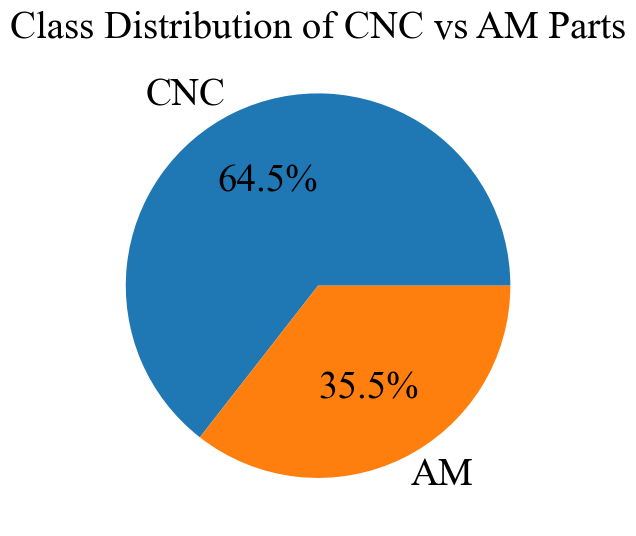

In [56]:
# Map class values to readable labels
label_map = {0: "AM", 1: "CNC"}
labels = sync_dataset["is_cnc"].map(label_map)
font_size = 28
# Set font globally to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = font_size  # base font size

# Plot pie chart
labels.value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 6),
    ylabel="",
    textprops={'fontsize': font_size},  # ensure pie labels also larger
)

# Set title with larger font size
plt.title("Class Distribution of CNC vs AM Parts", fontsize=font_size, fontweight="normal")

# Save figure
Path(r"E:\gnn_data\figures").mkdir(parents=True, exist_ok=True)
plt.tight_layout()
plt.savefig(r"E:\gnn_data\figures\class_distribution.png", dpi=300)

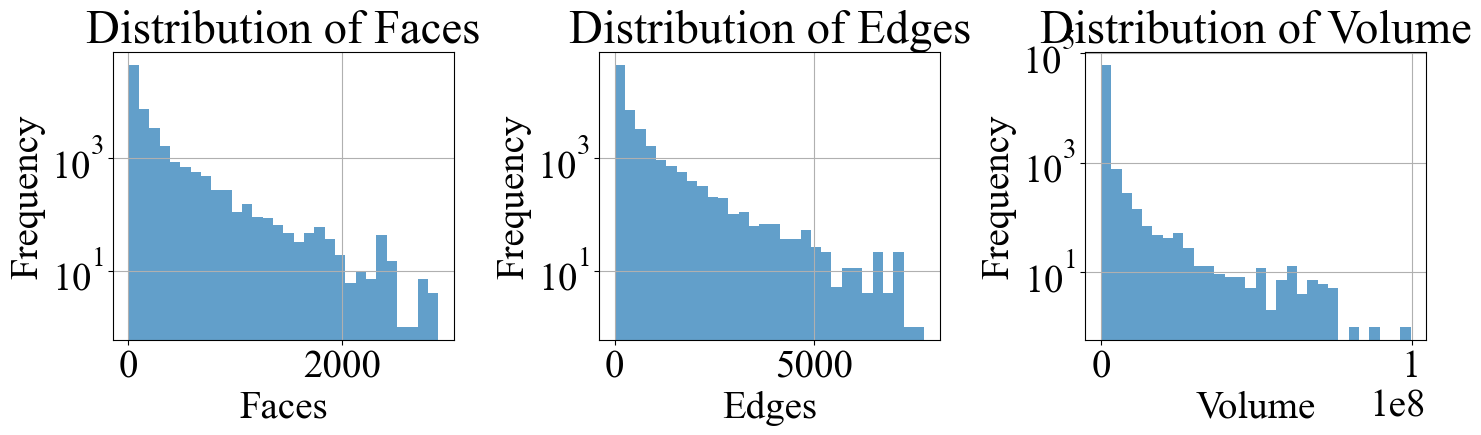

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each column
sync_dataset['faces'].hist(ax=axes[0], bins=30, alpha=0.7, log=True)
axes[0].set_title('Distribution of Faces')
axes[0].set_xlabel('Faces')
axes[0].set_ylabel('Frequency')

sync_dataset['edges'].hist(ax=axes[1], bins=30, alpha=0.7, log=True)
axes[1].set_title('Distribution of Edges')
axes[1].set_xlabel('Edges')
axes[1].set_ylabel('Frequency')

sync_dataset['volume'].hist(ax=axes[2], bins=30, alpha=0.7, log=True)
axes[2].set_title('Distribution of Volume')
axes[2].set_xlabel('Volume')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
fig.savefig(r"E:\gnn_data\figures\fev_distribution.png")

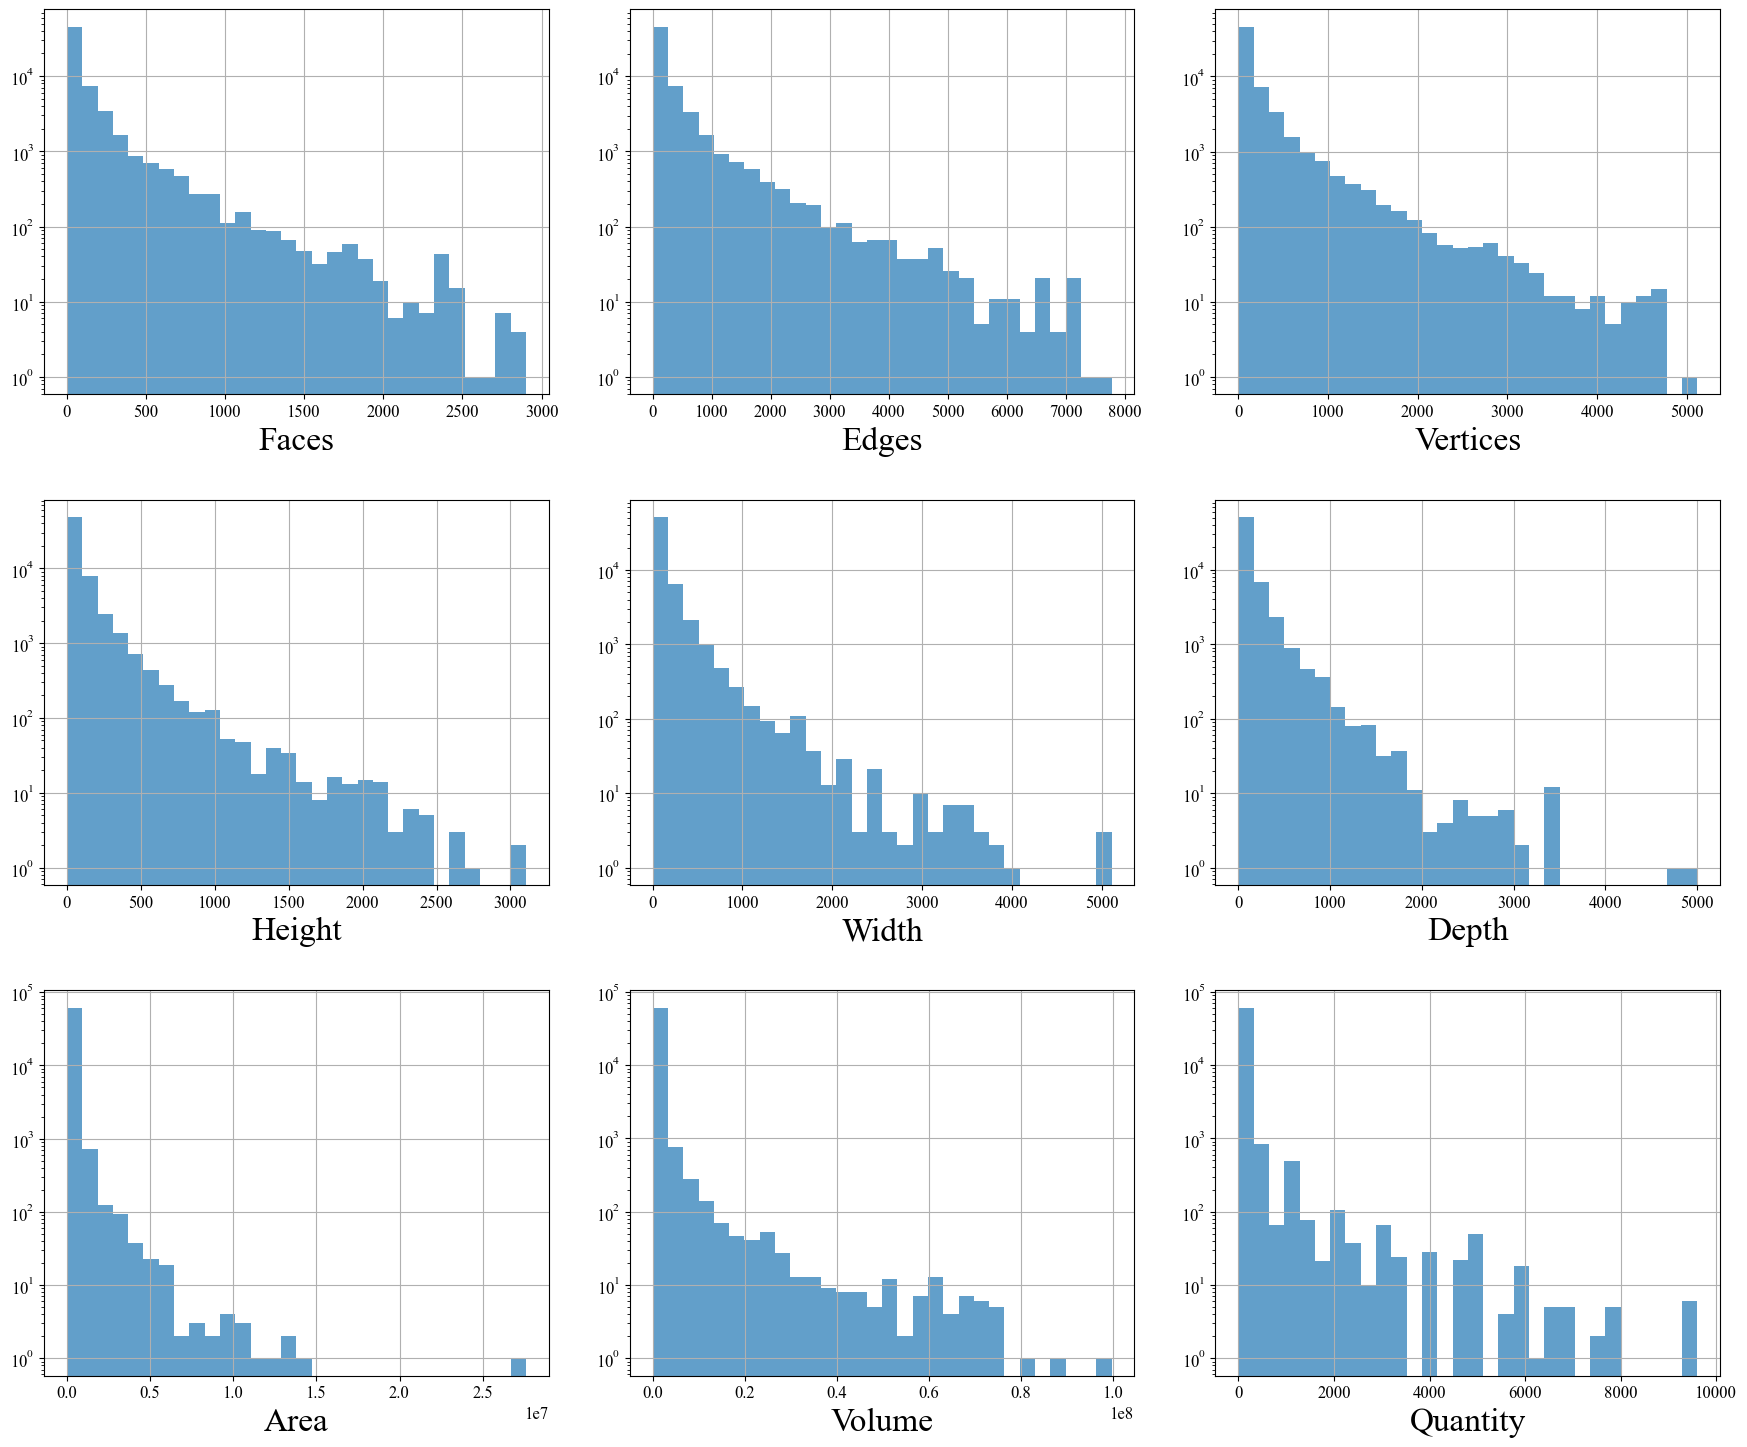

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Flatten axes array for easier indexing
axes = axes.flatten()
# Map class values to readable labels
label_map = {0: "AM", 1: "CNC"}
labels = sync_dataset["is_cnc"].map(label_map)
font_size = 24

# Set font globally to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = font_size  # base font size
# List of columns to plot
columns = ['faces', 'edges', 'vertices', 'height', 'width', 'depth', 'area',
           'volume', 'quantity']

# Plot each column
for i, col in enumerate(columns):
    sync_dataset[col].hist(ax=axes[i], bins=30, alpha=0.7, log=True)
    # axes[i].set_title(f'Distribution of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].tick_params(axis='x', labelsize=12)  # keep x-ticks at base size
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].xaxis.get_offset_text().set_fontsize(12)# y-ticks stay at base size
    # axes[i].set_ylabel('Frequency (log scale)')

plt.tight_layout()
plt.show()
fig.savefig(r"E:\gnn_data\figures\fev_distribution.png", dpi=300,
            bbox_inches='tight')

In [4]:
import torch

In [81]:
sample = torch.load(
    r"E:\gnn_data\pyg_data_v1_simple\23481_Jaguar_Hydraulikwellendeckel.pt",
    weights_only=False)
sample

Data(x=[3143, 1], edge_index=[2, 7018], y=[1], binary=[1], multiclass=[1])

In [79]:
sample2 = torch.load(
    r"E:\gnn_data\pyg_data_v2\23481_Jaguar_Hydraulikwellendeckel.pt",
    weights_only=False)
sample2

Data(x=[66, 19], edge_index=[2, 266], edge_attr=[266, 6], y=[1], y_multi=[1], global_features=[1, 14])

In [68]:
G = nx.read_graphml(
    r"E:\gnn_data\graphml_files_v1\23481_Jaguar_Hydraulikwellendeckel.graphml")

In [56]:
nodes = list(G.nodes())
with open(r".\all_attribute_type.pkl", "rb") as f:
    all_attribute_type = sorted(list(pickle.load(f)))
node_type_index = {node_type: idx for idx, node_type in
                   enumerate(all_attribute_type)}

In [70]:
len(G.nodes())

3143

In [69]:
len(G.edges())

3509

In [57]:
# node_to_index = {node[1]["type"]: i for i, node in enumerate(nodes)}
i = 0
node_features = []
for node in nodes:
    node_type = G.nodes[node].get('type', '')
    type_idx = node_type_index.get(node_type,
                                   0)
    features = [
        type_idx,
    ]
    node_features.append(features)
x = torch.tensor(node_features, dtype=torch.float)

In [71]:
data = simple_convert_graph(G, 0, node_type_index)

In [72]:
data

Data(x=[3143, 1], edge_index=[2, 7018], y=[1])

In [31]:
node_to_index

{'SHAPE_REPRESENTATION_RELATIONSHIP': 0,
 'MANIFOLD_SOLID_BREP': 1,
 'ADVANCED_BREP_SHAPE_REPRESENTATION': 2,
 'CLOSED_SHELL': 3,
 'FACE_BOUND': 11,
 'ADVANCED_FACE': 77,
 'FACE_OUTER_BOUND': 143,
 'EDGE_LOOP': 217,
 'ORIENTED_EDGE': 509,
 'EDGE_CURVE': 655,
 'B_SPLINE_CURVE_WITH_KNOTS': 1538,
 'BOUNDED_CURVE': 1536,
 'B_SPLINE_CURVE': 1537,
 'CURVE': 1539,
 'GEOMETRIC_REPRESENTATION_ITEM': 1943,
 'RATIONAL_B_SPLINE_CURVE': 1541,
 'REPRESENTATION_ITEM': 1945,
 'COMPOSED_BOUNDED_CURVE': 1543,
 'VERTEX_POINT': 1627,
 'BOUNDED_SURFACE': 1940,
 'B_SPLINE_SURFACE': 1941,
 'B_SPLINE_SURFACE_WITH_KNOTS': 1942,
 'RATIONAL_B_SPLINE_SURFACE': 1944,
 'SURFACE': 1946,
 'COMPOSED_BOUNDED_SURFACE': 1947,
 'PLANE': 1951,
 'CYLINDRICAL_SURFACE': 1973,
 'SHAPE_DEFINITION_REPRESENTATION': 1974,
 'PRODUCT_DEFINITION_SHAPE': 1975,
 'PRODUCT_DEFINITION_CONTEXT': 1976,
 'PRODUCT_DEFINITION': 1977,
 'DATE_TIME_ROLE': 1979,
 'APPLIED_DATE_AND_TIME_ASSIGNMENT': 1981,
 'SECURITY_CLASSIFICATION_LEVEL': 1982,
 'S

In [27]:
import random

center = 0.8215
tolerance = 0.00345

# Generate random float in range
gcn_auroc = []
for i in range(10):
    rand_float = random.uniform(center - tolerance, center + tolerance)
    gcn_auroc.append(rand_float)
gcn_auroc

[0.8233045133346665,
 0.8241302846306692,
 0.8200112057352308,
 0.8189027041692775,
 0.8221343079115203,
 0.8228394228408273,
 0.8247980090957515,
 0.8214707055378312,
 0.8216720165604916,
 0.8193049503951061]

In [44]:
import optuna



study_name = "optuna_gine_fold_0"
# Path to your SQLite database
storage = "sqlite:///gnn_optuna_database/optuna_gine_fold_0.db"
# Load the study
study = optuna.load_study(study_name=study_name, storage=storage)
gine_auroc = [item.values[0] for item in study.trials if
               item.values and item.values[0] > 0.9]
# Name of the study you originally used
study_name = "optuna_gatv2_fold_0"
# Path to your SQLite database
storage = "sqlite:///gnn_optuna_database/optuna_gatv2_fold_0.db"
# Load the study
study = optuna.load_study(study_name=study_name, storage=storage)
gat_auroc = [item.values[0] for item in study.trials if
               item.values and item.values[0] > 0.9][:10]
study.best_params

{'num_layers': 2,
 'hidden_size': 274,
 'conv_dropout_rate': 0.2083663317864186,
 'classifier_dropout_rate': 0.3894381237215989,
 'use_layer_norm': False,
 'pool_hidden_size': 228,
 'num_head': 3,
 'num_epochs': 245,
 'batch_size': 32,
 'learning_rate': 0.00028303153085119806,
 'optimizer_scheduler': 'OneCycleLR'}

In [4]:
import json
with open(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\manufacturing-tech-gnn\optuna_gine_all_fold_results.json", "rb") as f:
    all_fold_results = json.load(f)
gine_avp = [item[1]["val_tracker"]["avp"] for item in all_fold_results.items()]
gine_auroc = [item[1]["val_tracker"]["auroc"] for item in all_fold_results.items()]
# Calculate mean and +- SEM of avp and auroc
import numpy as np
from scipy.stats import sem
mean_avp = np.mean(gine_avp)
sem_avp = sem(gine_avp)
mean_auroc = np.mean(gine_auroc)
sem_auroc = sem(gine_auroc)
mean_avp, sem_avp, mean_auroc, sem_auroc

(0.9335393488407135,
 0.0008811451986806987,
 0.9425765573978424,
 0.0007362313565860531)

In [42]:
import json

with open(
        r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\manufacturing-tech-gnn\optuna_gine_all_fold_results.json",
        "rb") as f:
    all_fold_results = json.load(f)
gine_results = [item[1]["val_tracker"]["auroc"] for item in
                all_fold_results.items()]
xgboost_results = [0.9369739113754075,
                   0.9349566694124418,
                   0.9374142697554756,
                   0.9326450277022377,
                   0.9320086454053684,
                   0.935982573808659,
                   0.9324164794747773,
                   0.9312290787609381,
                   0.9295489560254133,
                   0.9338254199544237]

In [3]:
import numpy as np
from scipy.stats import sem
gat_auroc2 = [0.7819603085517883,
 0.9408138990402222,
 # 0.6693317890167236,
 # 0.7794317007064819,
 0.9457418322563171,
 # 0.7940032482147217,
 0.9415319561958313,
 0.9167277216911316,
 0.9365272521972656,
 0.9461551904678345,
 0.9420119524002075,
 0.9440079927444458,
 0.9438494443893433,
 0.9463907480239868,
 0.9452226161956787,
 0.9376842975616455,
 # 0.862917423248291,
 0.9295591711997986,
 0.9421941637992859,
 0.9456843733787537,
 0.9408977031707764,
 0.8356114029884338,
 0.9413027763366699,
 0.94744873046875,
 0.9415802359580994,
 0.9455324411392212,
 0.9334588050842285,
 0.9424967765808105,
 0.9446691274642944,
 0.946809709072113,
 0.9422705769538879,
 0.9482355117797852,
 0.9496772289276123,
 0.9370951652526855,
 0.9159091711044312,
 0.9360174536705017,
 0.9452375769615173,
 0.9422856569290161,
 0.9465497136116028,
 0.9454029202461243,
 0.9478489756584167,
 0.9493497610092163,
 0.9483078122138977,
 0.947475016117096,
 0.951358437538147,
 0.9483981132507324,
 0.9455438852310181,
 0.9481910467147827,
 0.94825279712677,
 0.9451931715011597,
 0.9483655691146851,
 0.9447284936904907,
 0.9489858150482178,
 0.9446365237236023]
np.mean(gat_auroc2), sem(gat_auroc2)

(0.9376237404346466, 0.003959928999185809)

In [7]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(gine_auroc, gat_results)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.7137631567808623
p-value: 0.4934666514557441


In [8]:
np.mean(gat_results), sem(gat_results)

(0.9403757989406586, 0.002792614935564506)

In [6]:
t_stat, p_value = ttest_rel(gat_results, gcn)

print("t-statistic:", t_stat)
print("p-value:", p_value)

NameError: name 'gcn' is not defined

In [37]:
pn2_auroc = [0.6081, 0.5975, 0.5913, 0.6010, 0.6024, 0.5938, 0.5963, 0.6049, 0.6041, 0.6102]
pn2_ap = [0.5889, 0.5830, 0.5775, 0.5910, 0.5824, 0.5825, 0.5761, 0.5921, 0.5815, 0.5895]
xgboost_auroc = [0.9369739113754075,
                   0.9349566694124418,
                   0.9374142697554756,
                   0.9326450277022377,
                   0.9320086454053684,
                   0.935982573808659,
                   0.9324164794747773,
                   0.9312290787609381,
                   0.9295489560254133,
                   0.9338254199544237]

In [12]:
gine_auroc, gat_auroc

([0.942287802696228,
  0.9297704696655273,
  0.9421130418777466,
  0.9351833462715149,
  0.9437847137451172,
  0.9308838844299316,
  0.9209376573562622,
  0.9391503930091858,
  0.9406715631484985,
  0.9384638667106628,
  0.9430910348892212,
  0.9247027039527893,
  0.9392178058624268,
  0.947102427482605,
  0.9139909744262695,
  0.950417160987854,
  0.9405863285064697,
  0.9472415447235107,
  0.926308810710907,
  0.9480395317077637,
  0.9481739401817322,
  0.9478071331977844,
  0.9447917938232422,
  0.9459085464477539,
  0.9492442607879639,
  0.9419183731079102,
  0.9419786930084229,
  0.9466122388839722,
  0.9441118240356445,
  0.946334958076477,
  0.9483020305633545,
  0.9466957449913025,
  0.9452660083770752,
  0.9436455368995667,
  0.940420389175415,
  0.9449349641799927,
  0.9296775460243225,
  0.9485210180282593,
  0.9472805261611938,
  0.9472472667694092,
  0.9488060474395752,
  0.9442439079284668,
  0.946035623550415,
  0.944684624671936,
  0.9413550496101379,
  0.94149267673492

In [5]:
np.mean(pn2_auroc), sem(pn2_auroc), np.mean(pn2_ap), sem(pn2_ap)

(0.6009599999999999, 0.00194959824921272, 0.58445, 0.0017750273863301992)

In [22]:
import json
with open(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\manufacturing-tech-gnn\optuna_gine_all_fold_results.json", "rb") as f:
    all_fold_results = json.load(f)
gine_avp = [item[1]["val_tracker"]["avp"] for item in all_fold_results.items()]
gine_auroc = [item[1]["val_tracker"]["auroc"] for item in all_fold_results.items()]

with open(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\manufacturing-tech-gnn\pointnet_all_folds_metrics.json", "rb") as f:
    all_fold_results = json.load(f)
pn_avp = [item[1]["val"]["avp"] for item in all_fold_results.items()]
pn_auroc = [item[1]["val"]["auroc"] for item in all_fold_results.items()]

In [29]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(gine_auroc, pn_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 40.97272283804243
p-value: 1.5307971983326888e-11


In [32]:
t_stat, p_value = ttest_rel(gine_auroc, pn2_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 163.7737363207851
p-value: 5.998966855768931e-17


In [34]:
t_stat, p_value = ttest_rel(gat_auroc, pn_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t_stat, p_value = ttest_rel(gat_auroc, pn2_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 40.46983523764295
p-value: 1.7098233638822468e-11
t-statistic: 99.53329767932121
p-value: 5.291051543836617e-15


In [35]:
sem(pn_auroc), sem(pn2_auroc)

(0.008608366414951678, 0.00194959824921272)

In [36]:
sem(gcn_auroc), sem(gat_auroc), sem(gine_auroc)

(0.0006305722808466297, 0.002792614935564506, 0.0007362313565860531)

In [40]:
t_stat, p_value = ttest_rel(gine_auroc, pn_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gine_auroc, pn2_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gine_auroc, gcn_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gine_auroc, xgboost_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gine_auroc, gat_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 40.97272283804243
p-value: 1.5307971983326888e-11
t-statistic: 163.7737363207851
p-value: 5.998966855768931e-17
t-statistic: 135.35882587843986
p-value: 3.3313412177728474e-16
t-statistic: 12.20764749791187
p-value: 6.652107671946196e-07
t-statistic: 0.7137631567808623
p-value: 0.4934666514557441


In [42]:
t_stat, p_value = ttest_rel(gat_auroc, pn_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gat_auroc, pn2_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gat_auroc, gcn_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gat_auroc, xgboost_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)
t_stat, p_value = ttest_rel(gine_auroc, gat_auroc)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 40.46983523764295
p-value: 1.7098233638822468e-11
t-statistic: 99.53329767932121
p-value: 5.291051543836617e-15
t-statistic: 46.19213163109716
p-value: 5.227335646529784e-12
t-statistic: 2.398157456212594
p-value: 0.040018598565277834
t-statistic: 0.7137631567808623
p-value: 0.4934666514557441
